<a href="https://colab.research.google.com/github/jatinlala007/Project_6220/blob/main/INSE_6220_Final_Project_Jatin_Lala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

1.3.5


In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/jatinlala007/Project_6220/main/HCI123.csv')
df.head(n=10)

,Country Name,WB Code,POS,EYS,HTS,ASR,HCI (LB),HCI,HCI (UB),Class
0,Afghanistan,AFG,0.94,8.9,355,0.79,0.39,0.40,0.41,1
1,Albania,ALB,0.99,12.9,434,0.93,0.62,0.63,0.64,3
2,Algeria,DZA,0.98,11.8,374,0.91,0.53,0.53,0.54,2
3,Angola,AGO,0.92,8.1,326,0.73,0.33,0.36,0.39,2
4,Antigua and Barbuda,ATG,0.99,13.0,407,0.90,0.58,0.60,0.61,4
5,Argentina,ARG,0.99,12.9,408,0.89,0.59,0.60,0.61,3
6,Armenia,ARM,0.99,11.3,443,0.89,0.57,0.58,0.59,3
7,Australia,AUS,1.00,13.6,516,0.95,0.76,0.77,0.78,4
8,Austria,AUT,1.00,13.4,508,0.94,0.74,0.75,0.76,4
9,Azerbaijan,AZE,0.98,12.4,416,0.88,0.56,0.58,0.59,3


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  174 non-null    object 
 1   WB Code       174 non-null    object 
 2   POS           174 non-null    float64
 3   EYS           174 non-null    float64
 4   HTS           174 non-null    int64  
 5   ASR           174 non-null    float64
 6   HCI (LB)      174 non-null    float64
 7   HCI           174 non-null    float64
 8   HCI (UB)      174 non-null    float64
 9   Class         174 non-null    int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 13.7+ KB


In [51]:
y = df['Class']
c=y.copy()
print(c)
target = df['Class'].to_numpy()

0      1
1      3
2      2
3      2
4      4
      ..
169    2
170    2
171    1
172    2
173    2
Name: Class, Length: 174, dtype: int64


In [52]:
df.drop(['WB Code','Country Name',],axis=1,inplace=True)

In [53]:
X = df.iloc[:,0:7]
X.head(10)

,POS,EYS,HTS,ASR,HCI (LB),HCI,HCI (UB)
0,0.94,8.9,355,0.79,0.39,0.40,0.41
1,0.99,12.9,434,0.93,0.62,0.63,0.64
2,0.98,11.8,374,0.91,0.53,0.53,0.54
3,0.92,8.1,326,0.73,0.33,0.36,0.39
4,0.99,13.0,407,0.90,0.58,0.60,0.61
5,0.99,12.9,408,0.89,0.59,0.60,0.61
6,0.99,11.3,443,0.89,0.57,0.58,0.59
7,1.00,13.6,516,0.95,0.76,0.77,0.78
8,1.00,13.4,508,0.94,0.74,0.75,0.76
9,0.98,12.4,416,0.88,0.56,0.58,0.59


In [54]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
POS,174.0,0.972529,0.028679,0.88,0.96,0.980,0.9900,1.00
EYS,174.0,11.305747,2.331456,4.20,10.00,12.100,13.1000,13.90
HTS,174.0,423.109195,63.270907,305.00,375.50,413.500,473.7500,575.00
ASR,174.0,0.848046,0.085245,0.52,0.80,0.860,0.9200,0.96
HCI (LB),174.0,0.546609,0.143622,0.26,0.43,0.550,0.6550,0.87
HCI,174.0,0.561207,0.139260,0.29,0.45,0.565,0.6575,0.88
HCI (UB),174.0,0.573736,0.136159,0.32,0.46,0.570,0.6700,0.89


In [55]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
POS,174.0,-7.615875e-15,1.002886,-3.235699,-0.438126,0.261268,0.610964,0.960661
EYS,174.0,1.556864e-16,1.002886,-3.056568,-0.561673,0.341651,0.771806,1.115929
HTS,174.0,2.143879e-16,1.002886,-1.872109,-0.754637,-0.152312,0.802690,2.407570
ASR,174.0,-6.674099e-16,1.002886,-3.859386,-0.565250,0.140636,0.846523,1.317114
HCI (LB),174.0,3.777311e-16,1.002886,-2.001345,-0.814263,0.023677,0.756875,2.258185
HCI,174.0,5.206563e-16,1.002886,-1.953107,-0.800861,0.027316,0.693459,2.295801
HCI (UB),174.0,3.777311e-16,1.002886,-1.868909,-0.837728,-0.027515,0.709043,2.329469


In [56]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173]
['POS', 'EYS', 'HTS', 'ASR', 'HCI (LB)', 'HCI', 'HCI (UB)']


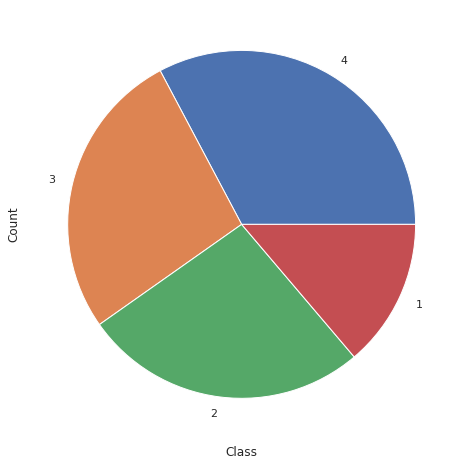

In [58]:
y.value_counts().plot(kind='pie', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

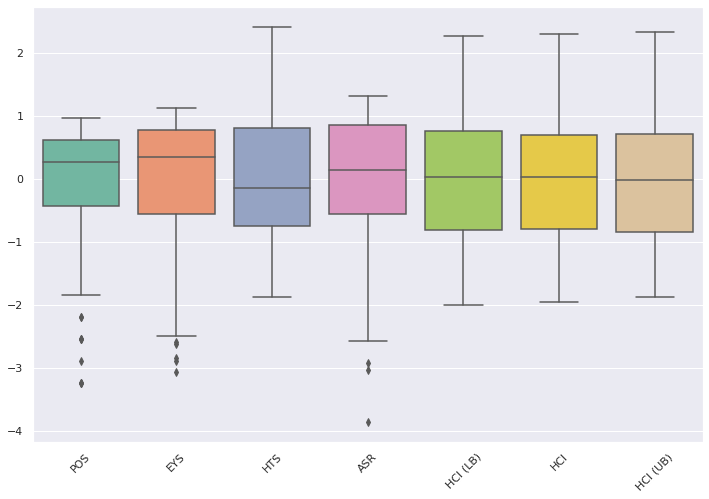

In [13]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

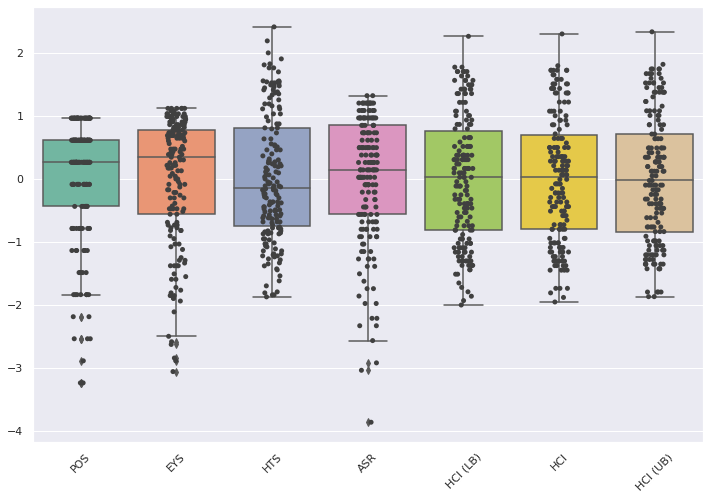

In [14]:
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [15]:
df.describe()

,POS,EYS,HTS,ASR,HCI (LB),HCI,HCI (UB)
count,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02
mean,-7.615875e-15,1.556864e-16,2.143879e-16,-6.674099e-16,3.777311e-16,5.206563e-16,3.777311e-16
std,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00
min,-3.235699e+00,-3.056568e+00,-1.872109e+00,-3.859386e+00,-2.001345e+00,-1.953107e+00,-1.868909e+00
25%,-4.381257e-01,-5.616727e-01,-7.546375e-01,-5.652500e-01,-8.142628e-01,-8.008609e-01,-8.377285e-01
50%,2.612676e-01,3.416513e-01,-1.523121e-01,1.406364e-01,2.367743e-02,2.731618e-02,-2.751508e-02
75%,6.109643e-01,7.718056e-01,8.026905e-01,8.465228e-01,7.568752e-01,6.934586e-01,7.090426e-01
max,9.606609e-01,1.115929e+00,2.407570e+00,1.317114e+00,2.258185e+00,2.295801e+00,2.329469e+00


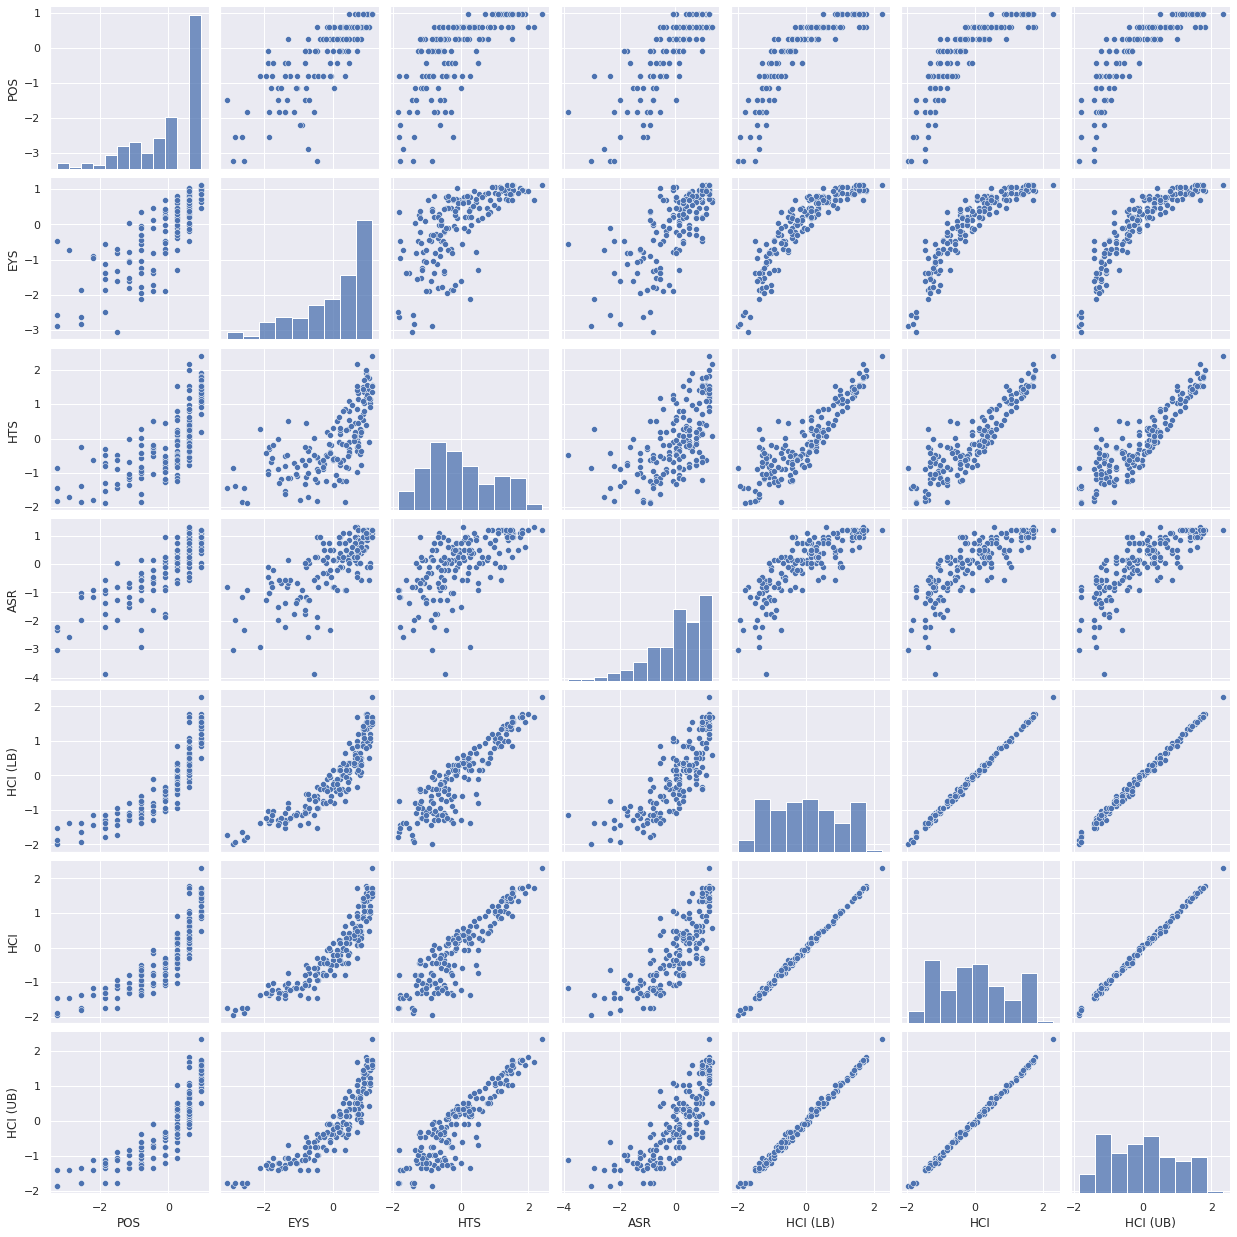

In [16]:
sns.pairplot(df)

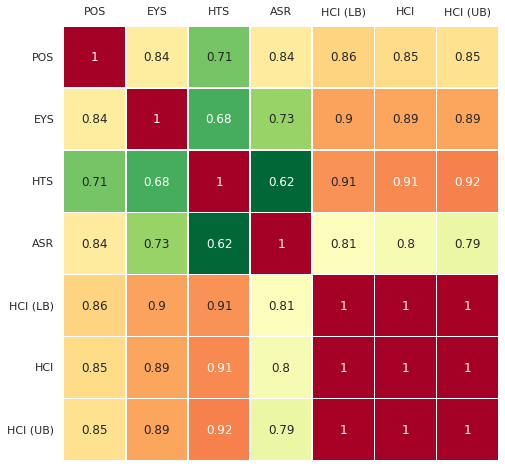

In [17]:
dfc = df - df.mean() 
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, '$Z_2$')

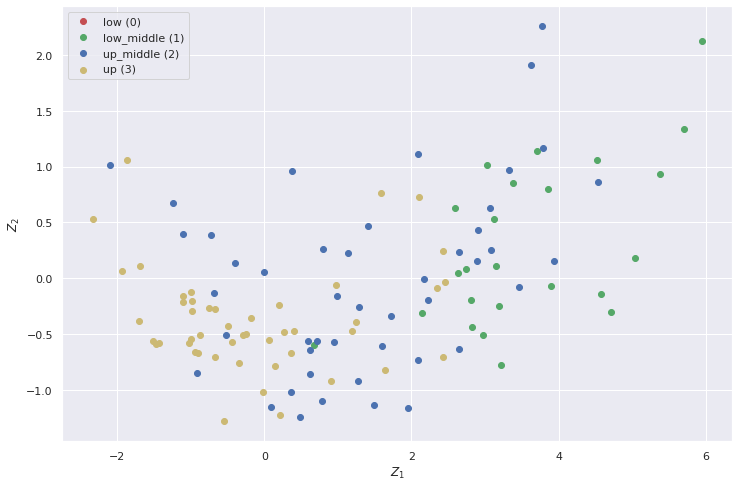

In [18]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
low = np.where(y == 0)
low_middle = np.where(y == 1)
up_middle = np.where(y == 2)
up = np.where(y==3)

plt. figure()
plt.scatter(Z[low,0], Z[low,1], c='r', label='low (0)')
plt.scatter(Z[low_middle,0], Z[low_middle,1], c='g', label='low_middle (1)')
plt.scatter(Z[up_middle,0], Z[up_middle,1], c='b', label='up_middle (2)')
plt.scatter(Z[up,0], Z[up,1], c='y', label='up (3)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

Eigenvector matrix:
[[-0.36746863 -0.40059505  0.00458693  0.8336957   0.09287864  0.02810418
  -0.00213577]
 [-0.36775449 -0.17662715  0.75187795 -0.1965988  -0.47754566 -0.03784858
   0.01027477]
 [-0.35637671  0.615615   -0.34361015  0.20644008 -0.57494681 -0.0519104
   0.00835738]
 [-0.34493289 -0.59043357 -0.55995416 -0.40715662 -0.23034947  0.0047367
   0.00100768]
 [-0.40210427  0.14115325  0.02413071 -0.13098805  0.39702107 -0.70497871
  -0.38213486]
 [-0.40167927  0.16341141  0.02839563 -0.13898814  0.36393686  0.05441434
   0.81019473]
 [-0.40088192  0.18467619  0.0406609  -0.14639259  0.29937138  0.7036367
  -0.44427071]]


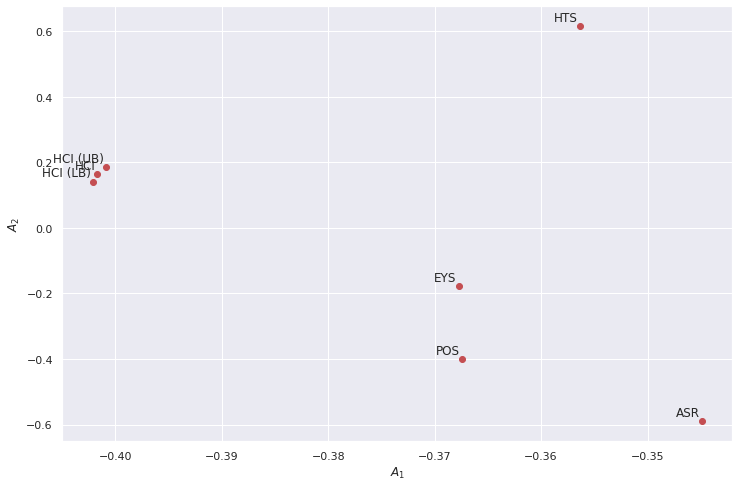

In [19]:
A = pca.components_.T 
print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


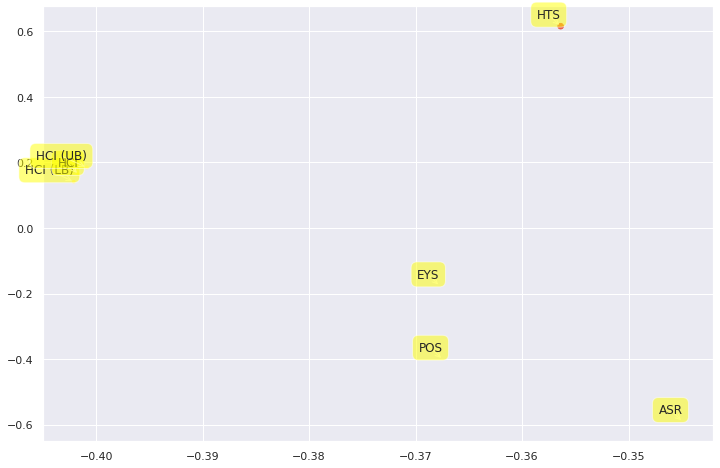

In [20]:
plt. figure()
plt.scatter(A[:,0],A[:,1],marker='o',c=A[:,2],s=A[:,1]*50,
    cmap=plt.get_cmap('Spectral'))
for label, x, y in zip(variables,A[:,0],A[:,1]):
    plt.annotate(label,xy=(x, y), xytext=(0, 5),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Eigenvalues:
[6.11162182e+00 4.82267536e-01 2.69741296e-01 1.48022676e-01
 2.61518199e-02 2.24957776e-03 4.07703686e-04]


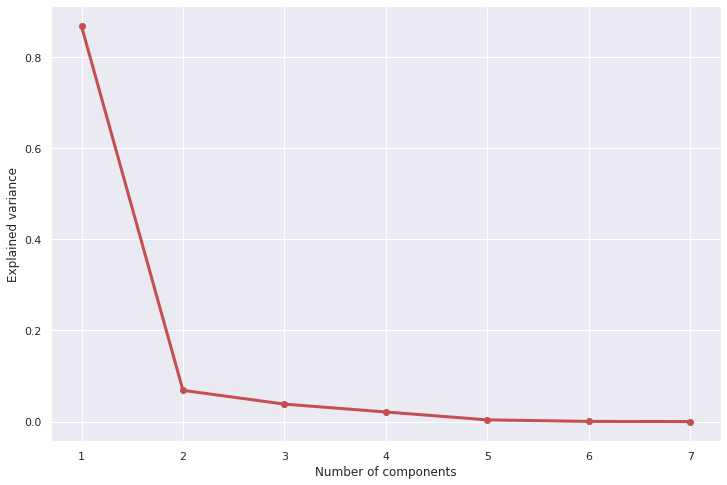

In [21]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

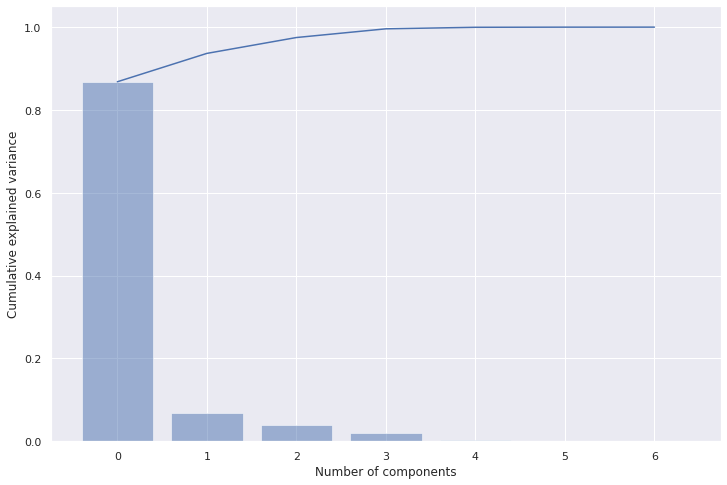

In [22]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [23]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (86.8%)',
 '1': 'PC 2 (6.8%)',
 '2': 'PC 3 (3.8%)',
 '3': 'PC 4 (2.1%)',
 '4': 'PC 5 (0.4%)',
 '5': 'PC 6 (0.0%)',
 '6': 'PC 7 (0.0%)'}

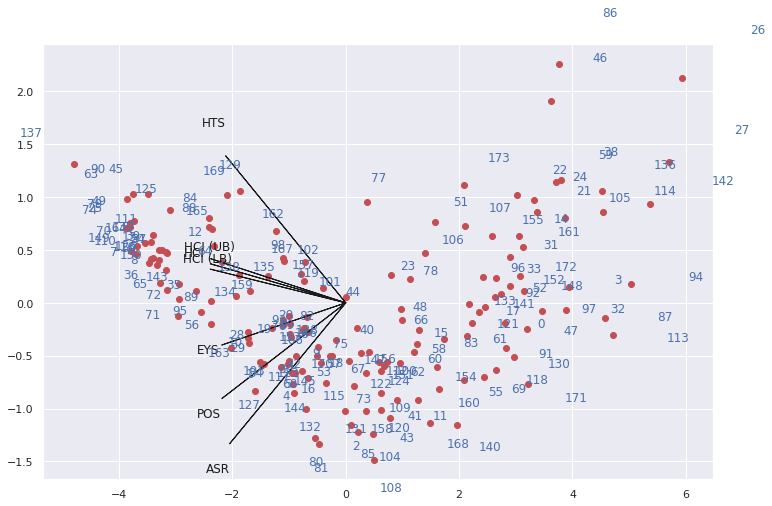

In [25]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure()
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='k', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
    
for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.scatter(Z1[i], Z2[i], c='r', marker='o')
    plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')  

In [27]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [29]:
print(out['topfeat'])

    PC   feature   loading  type
0  PC1  HCI (LB) -0.402104  best
1  PC2       HTS  0.615615  best
2  PC3       EYS  0.751878  best
3  PC2       POS -0.400595  weak
4  PC2       ASR -0.590434  weak
5  PC1       HCI -0.401679  weak
6  PC1  HCI (UB) -0.400882  weak


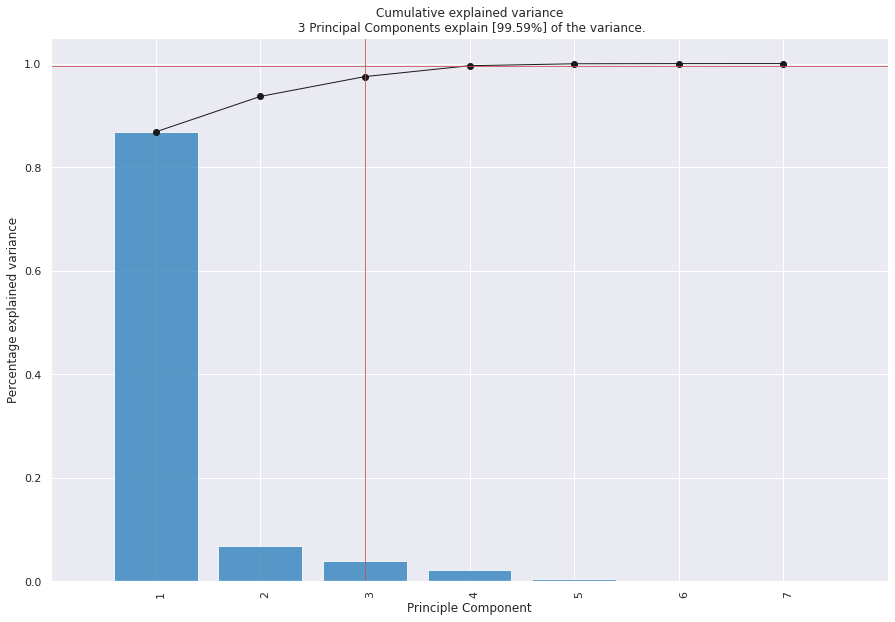

<Figure size 864x576 with 0 Axes>

In [30]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [174] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [174] unique colors! Available unique colors: [9].


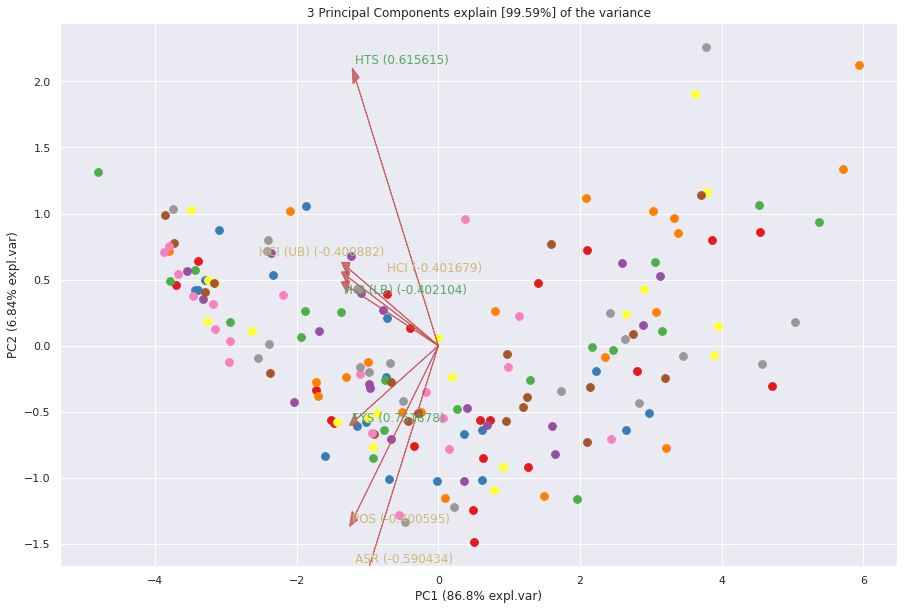

In [31]:
ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [174] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [174] unique colors! Available unique colors: [9].


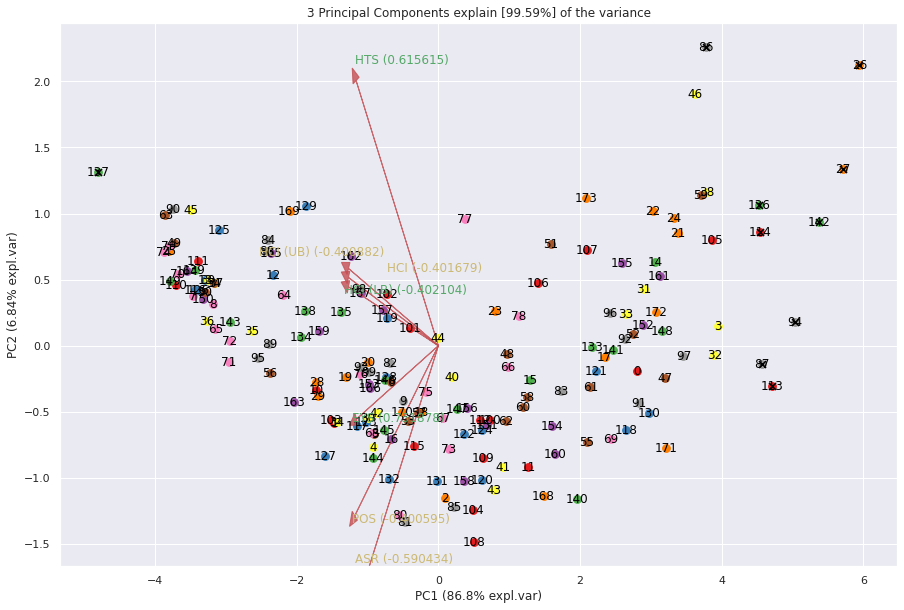

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe57adbcfd0>)

In [32]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


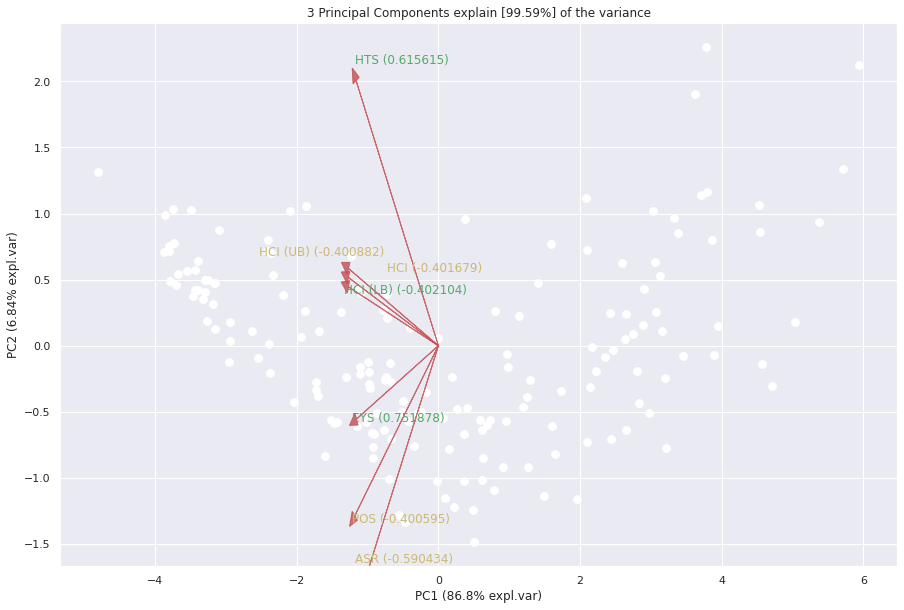

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe57a9c7970>)

In [33]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [174] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [174] unique colors! Available unique colors: [9].


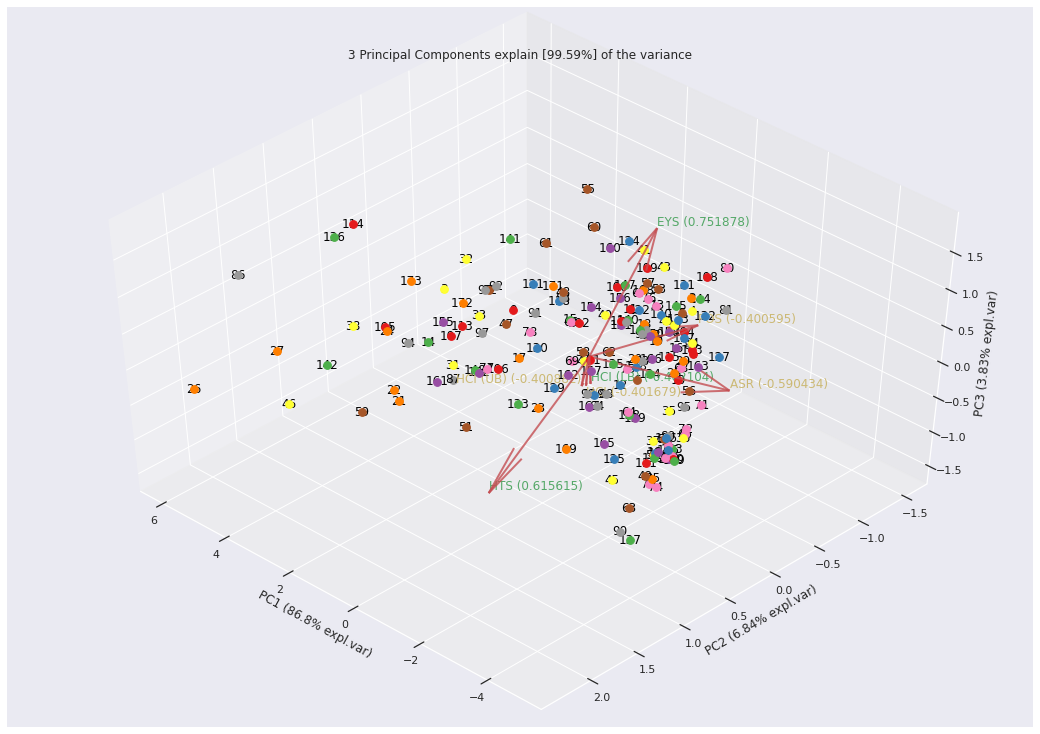

In [34]:
ax = model.biplot3d(legend=False)

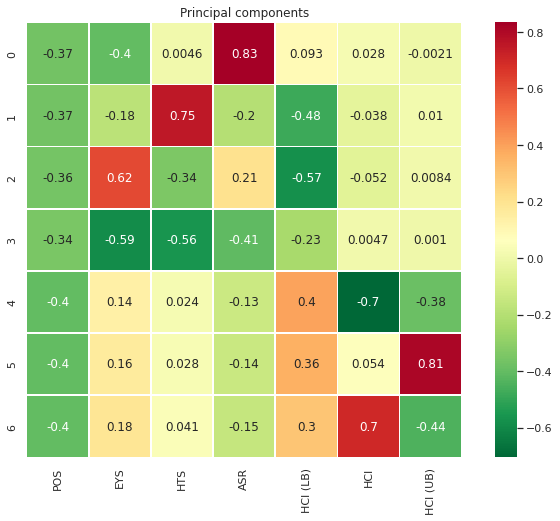

PC1:[-0.36746863 -0.36775449 -0.35637671 -0.34493289 -0.40210427 -0.40167927
 -0.40088192]
PC2:[-0.40059505 -0.17662715  0.615615   -0.59043357  0.14115325  0.16341141
  0.18467619]


In [35]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
#ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

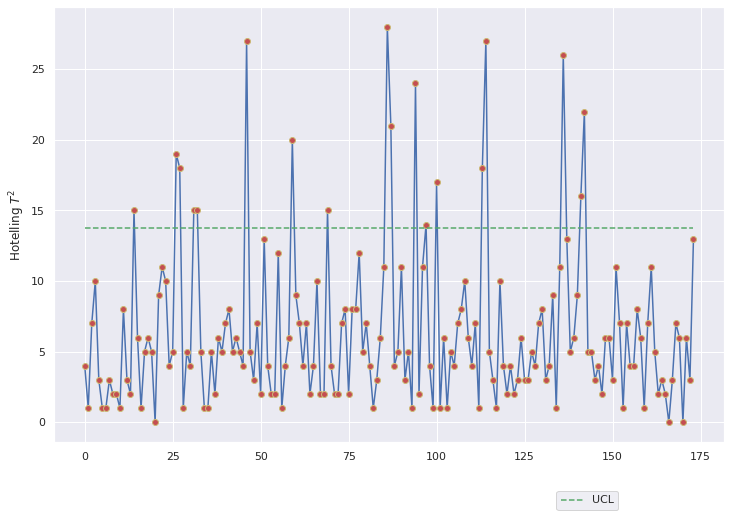

In [36]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [37]:
print(np.argwhere(Tsquare>UCL))

[[ 14]
 [ 26]
 [ 27]
 [ 31]
 [ 32]
 [ 46]
 [ 59]
 [ 69]
 [ 86]
 [ 87]
 [ 94]
 [ 97]
 [100]
 [113]
 [114]
 [136]
 [141]
 [142]]


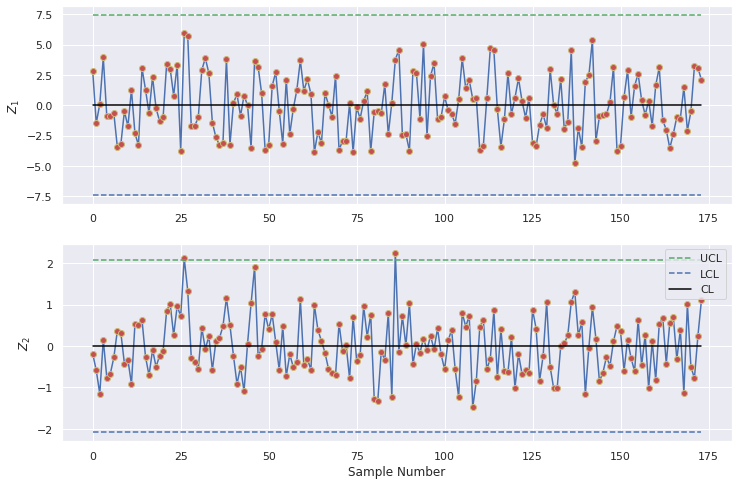

In [38]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

In [39]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[]
[[26]
 [86]]


In [40]:
X_train, X_test, y_train, y_test = train_test_split(df, c, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, c, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], c, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 121
Test Dataset Size: 53


DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      0.600     0.429     0.500         7
           2      0.400     0.308     0.348        13
           3      0.500     0.733     0.595        15
           4      0.938     0.833     0.882        18

    accuracy                          0.623        53
   macro avg      0.609     0.576     0.581        53
weighted avg      0.637     0.623     0.619        53



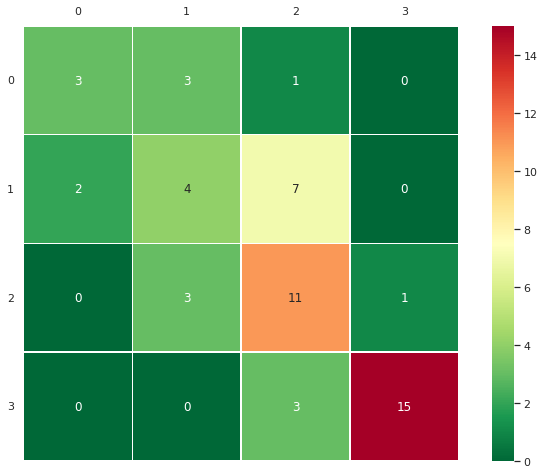

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.667     0.286     0.400         7
           2      0.385     0.385     0.385        13
           3      0.571     0.800     0.667        15
           4      0.938     0.833     0.882        18

    accuracy                          0.642        53
   macro avg      0.640     0.576     0.583        53
weighted avg      0.663     0.642     0.636        53



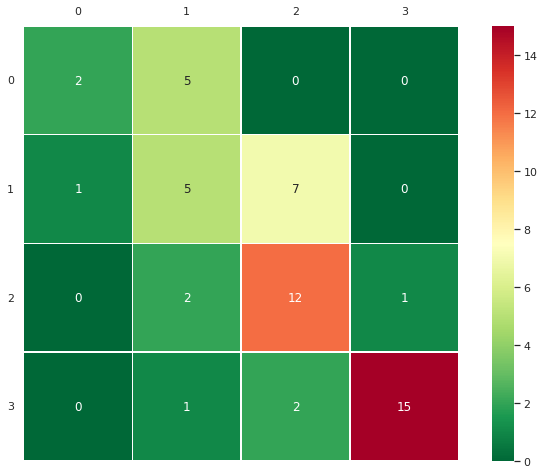

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.333     0.143     0.200         7
           2      0.273     0.231     0.250        13
           3      0.522     0.800     0.632        15
           4      0.938     0.833     0.882        18

    accuracy                          0.585        53
   macro avg      0.516     0.502     0.491        53
weighted avg      0.577     0.585     0.566        53



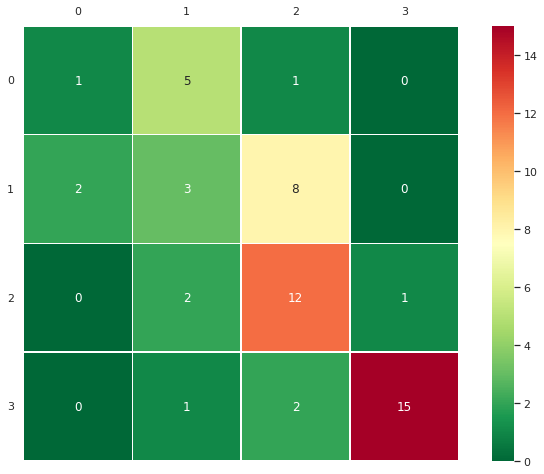

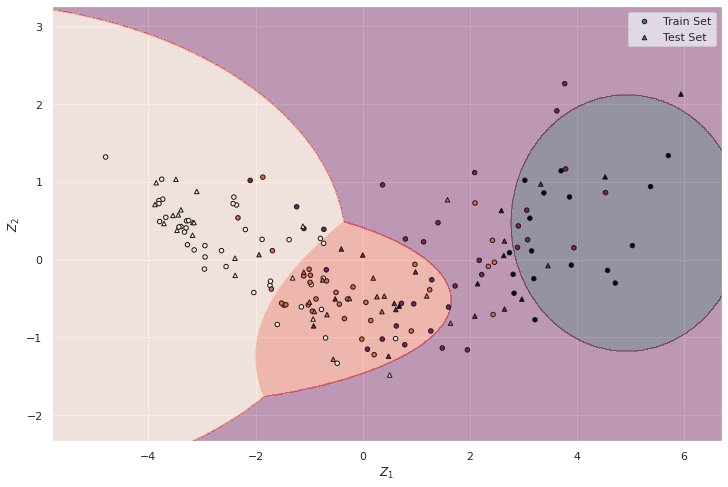

(array([ 5,  8, 11, 13, 18, 19, 20, 22, 23, 27, 29, 30, 35, 37, 39, 40, 42,
       43, 44, 45, 46, 50]),)


In [41]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

Grid Search Results:
k_full_data: {'n_neighbors': 8}
k_Z: {'n_neighbors': 8}
k_Z12: {'n_neighbors': 8}
                                    0         1         2         3         4
knn_full_data fit_time       0.003627  0.003071  0.003435  0.003387  0.003116
knn_Z  fit_time              0.001252  0.001430  0.001503  0.001607  0.001593
knn_Z12 fit_time             0.001731  0.001511  0.001405  0.001499  0.001589
knn_full_data test_f1_macro  0.651786  0.860577  0.433333  0.583333  0.742857
knn_Z  test_f1_macro         0.651786  0.860577  0.433333  0.583333  0.742857
knn_Z12 test_f1_macro        0.609661  0.894985  0.534921  0.670513  0.708974

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      0.500     0.429     0.462         7
           2      0.357     0.385     0.370        13
           3      0.625     0.667     0.645        15
           4      0.882     0.833     0.857        18

    accuracy                        

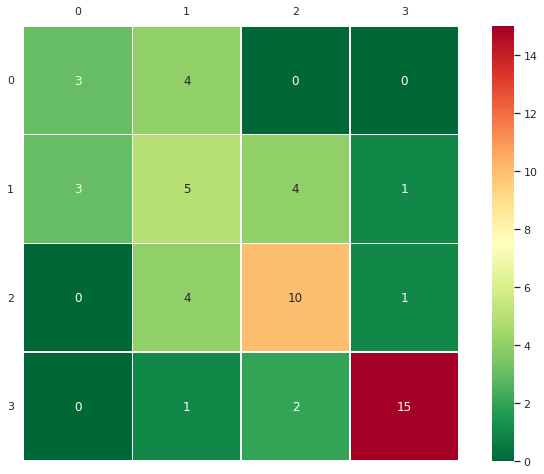

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.500     0.429     0.462         7
           2      0.357     0.385     0.370        13
           3      0.625     0.667     0.645        15
           4      0.882     0.833     0.857        18

    accuracy                          0.623        53
   macro avg      0.591     0.578     0.584        53
weighted avg      0.630     0.623     0.626        53



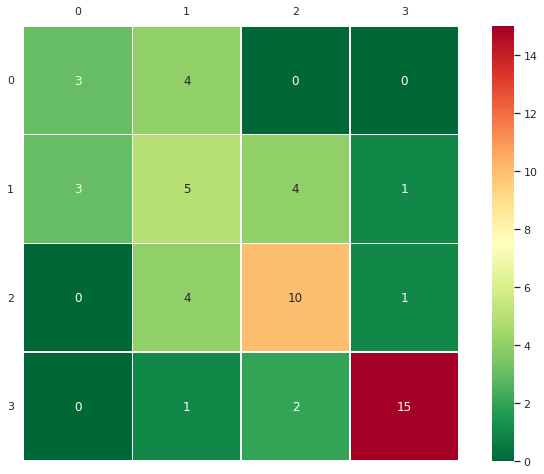

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.571     0.571     0.571         7
           2      0.375     0.462     0.414        13
           3      0.600     0.600     0.600        15
           4      0.933     0.778     0.848        18

    accuracy                          0.623        53
   macro avg      0.620     0.603     0.608        53
weighted avg      0.654     0.623     0.635        53



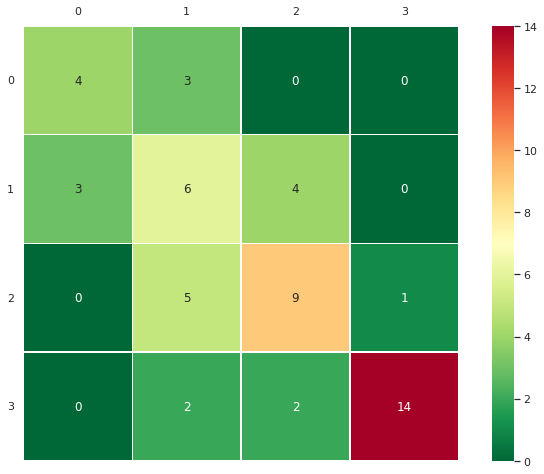

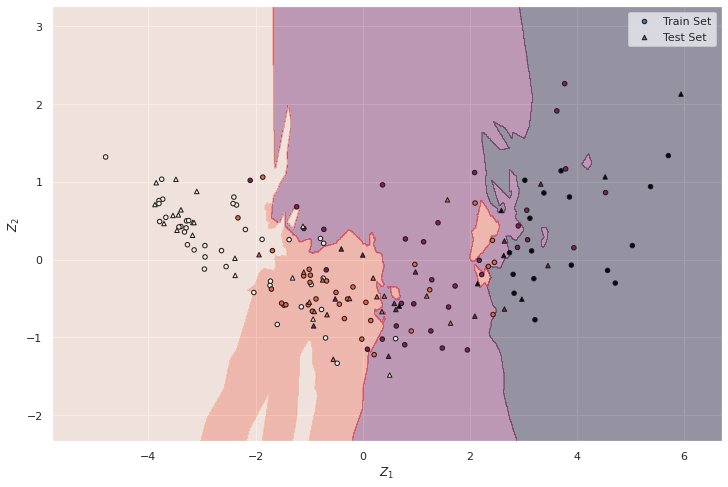

In [42]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

Grid Search Results:
depth_full_data: {'max_depth': 16}
depth_Z: {'max_depth': 16}
depth_Z12: {'max_depth': 16}
                                   0         1         2         3         4
dt_full_data fit_time       0.004420  0.003705  0.003603  0.003806  0.003938
dt_Z  fit_time              0.002693  0.001857  0.001697  0.001717  0.001775
dt_Z12 fit_time             0.001360  0.001330  0.001271  0.001235  0.001271
dt_full_data test_f1_macro  0.565359  0.684203  0.513095  0.608095  0.572863
dt_Z  test_f1_macro         0.501923  0.572917  0.594444  0.483333  0.563131
dt_Z12 test_f1_macro        0.636485  0.500000  0.603671  0.744444  0.734921

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           1      0.500     0.429     0.462         7
           2      0.267     0.308     0.286        13
           3      0.545     0.400     0.462        15
           4      0.667     0.778     0.718        18

    accuracy                      

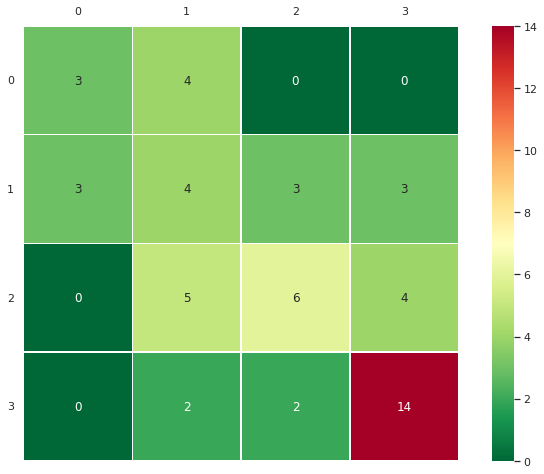

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           1      0.600     0.429     0.500         7
           2      0.364     0.308     0.333        13
           3      0.571     0.533     0.552        15
           4      0.696     0.889     0.780        18

    accuracy                          0.585        53
   macro avg      0.558     0.540     0.541        53
weighted avg      0.566     0.585     0.569        53



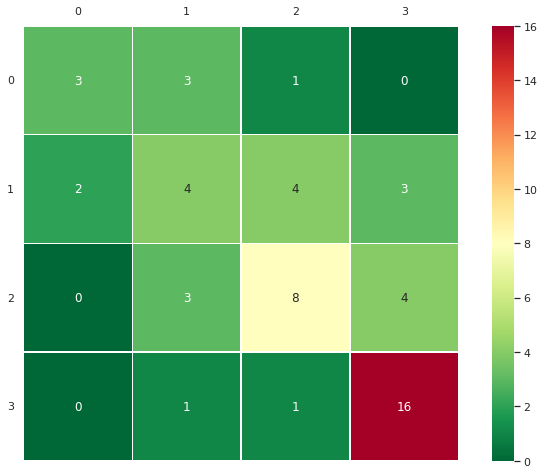

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           1      0.500     0.429     0.462         7
           2      0.273     0.231     0.250        13
           3      0.467     0.467     0.467        15
           4      0.714     0.833     0.769        18

    accuracy                          0.528        53
   macro avg      0.488     0.490     0.487        53
weighted avg      0.508     0.528     0.516        53



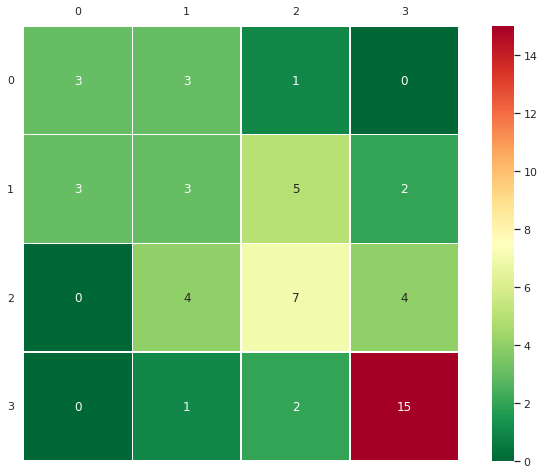

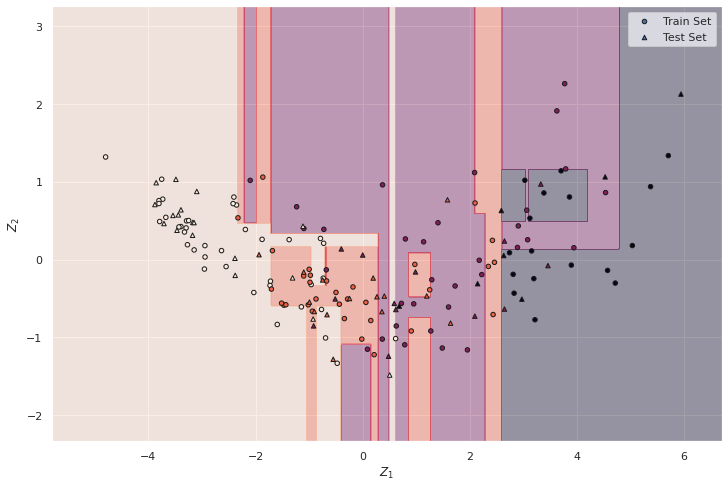

In [43]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

DATASET: FULL DATA


/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


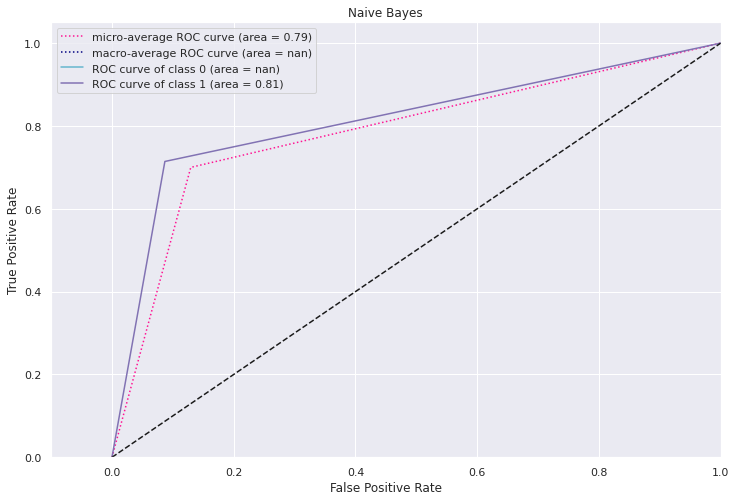

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


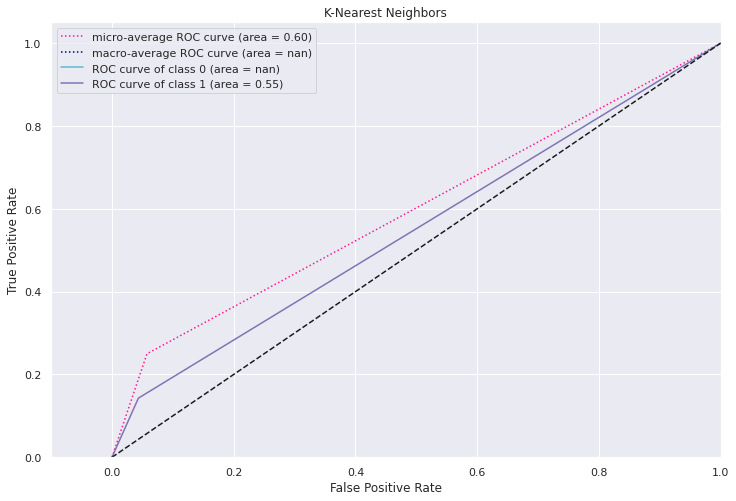

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


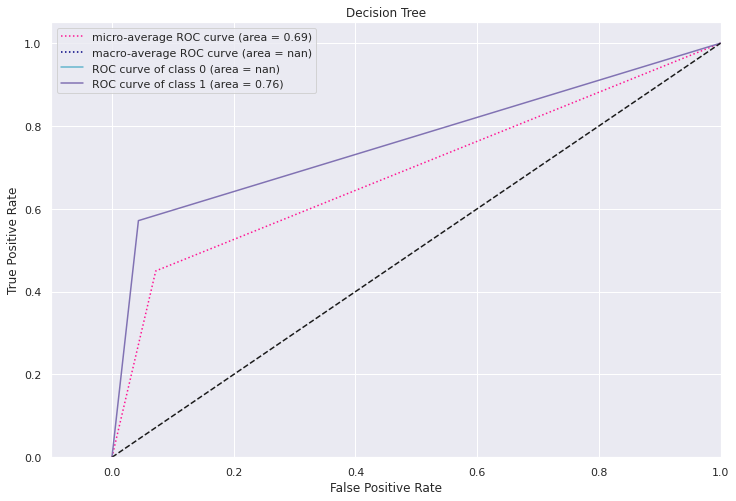

DATASET: Z


/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


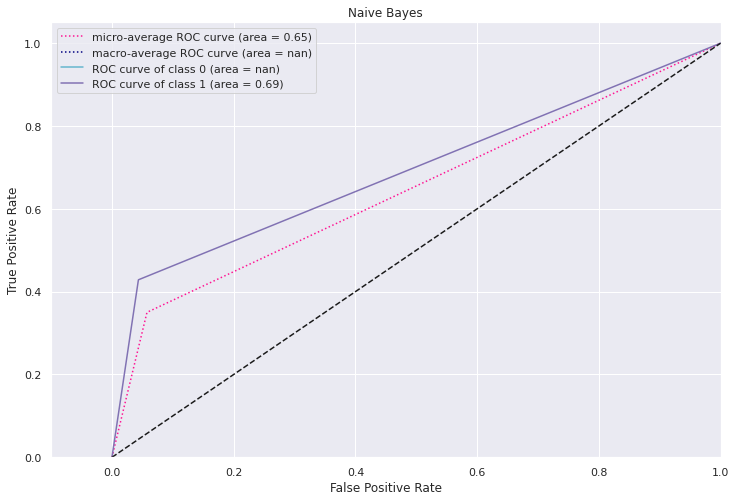

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


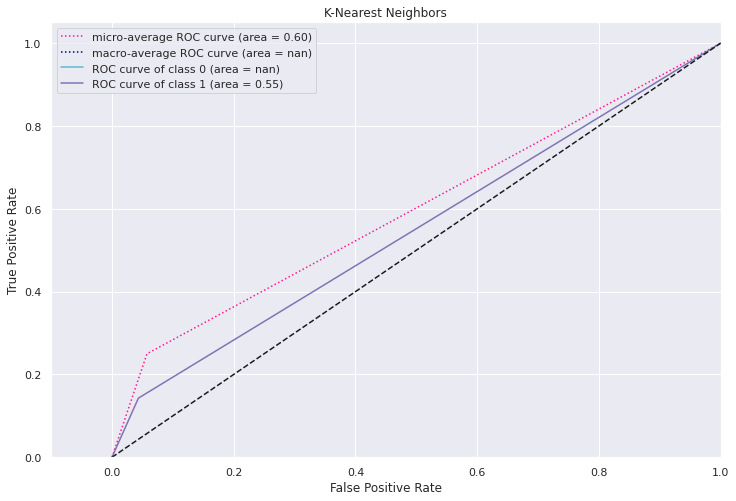

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


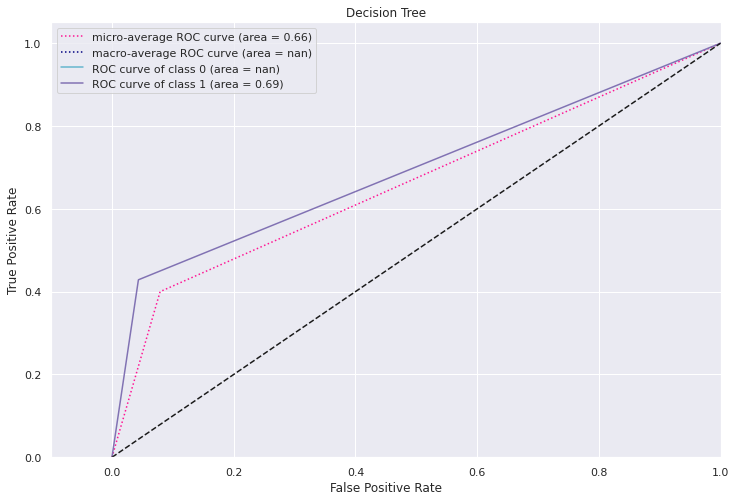

DATASET: Z12


/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


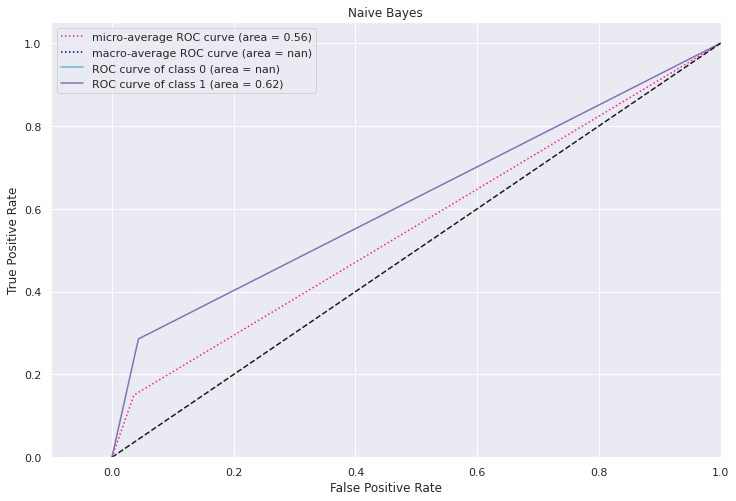

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


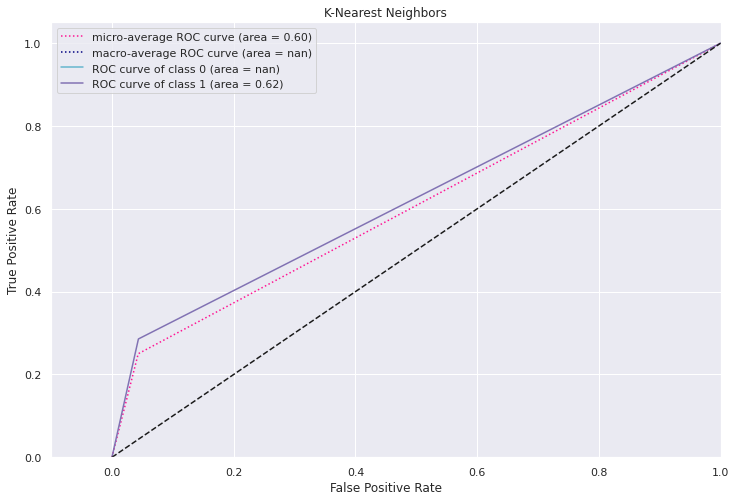

/usr/local/lib/python3.8/dist-packages/sklearn/multiclass.py:79: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


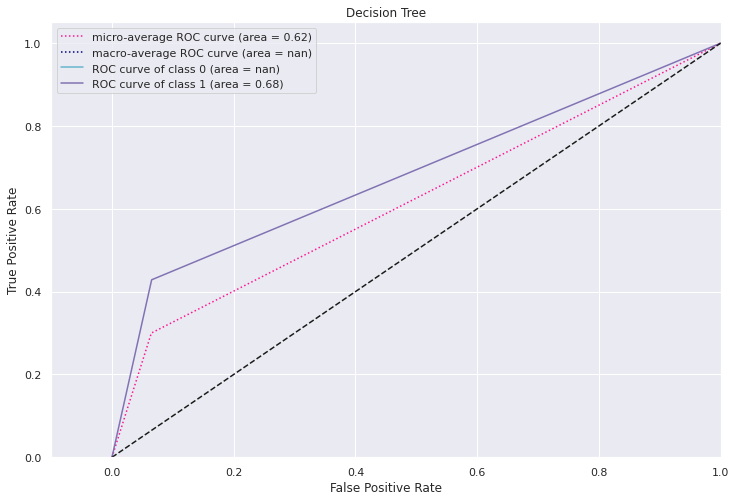

In [44]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes-1), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

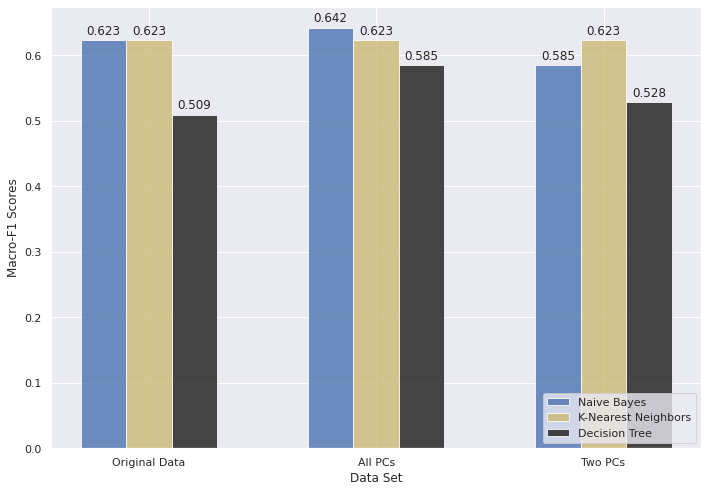

In [46]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.623, 0.642, 0.585)
KNN = (0.623, 0.623, 0.623)
DT = (0.509, 0.585, 0.528)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()